Forest Fires Dataset from UCI
http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

In [3]:
# Setup environment
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
import seaborn as sbn

In [2]:
dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

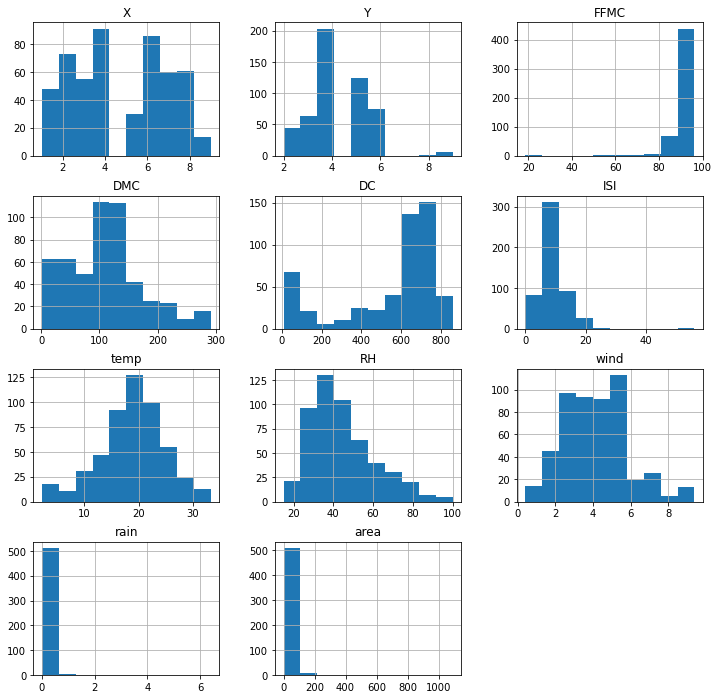

In [6]:
dataset.hist(figsize=(12,12))

<AxesSubplot:>

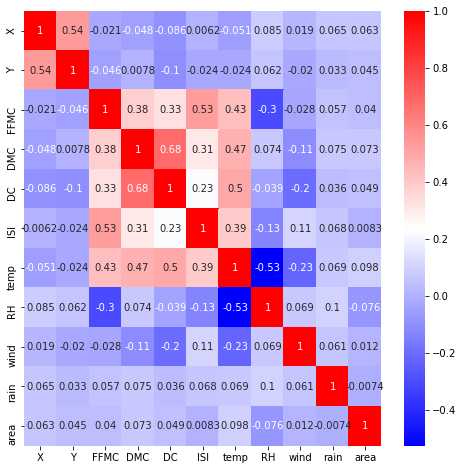

In [10]:
plt.figure(figsize=(8,8))
sbn.heatmap(dataset.corr(), annot=True, cmap='bwr')

In [34]:
# Prepare data
from sklearn.preprocessing import LabelEncoder

y = dataset['area']
X = dataset.loc[:, dataset.columns != 'area']

train_X, val_X, train_y, val_Y = train_test_split(X, y, random_state=0)

l_enc = LabelEncoder()

for col in ['month', 'day']:
    train_X[col] = l_enc.fit_transform(train_X[col])
    val_X[col] = l_enc.transform(val_X[col])


In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(train_X, train_y)

RandomForestRegressor()

In [36]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(val_X)

mean_absolute_error(val_Y, predictions)

28.236474153846157

In [37]:
predictions[0]

19.960299999999997

In [38]:
val_X.iloc[0]

X          7.0
Y          3.0
month      7.0
day        1.0
FFMC      87.6
DMC       52.2
DC       103.8
ISI        5.0
temp      11.0
RH        46.0
wind       5.8
rain       0.0
Name: 213, dtype: float64

In [40]:
val_Y.iloc[0]

27.35